# QAI Assignment-3

## Implementing a 5 qubit Quantum Fourier Transform

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Importing Necessary libraries

In [2]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ, execute
from qiskit.tools.monitor import job_monitor
from qiskit import Aer
from qiskit.tools.jupyter.library import _generate_circuit_library_visualization
from qiskit.circuit.library import QFT
import numpy as np

In [3]:
pip install pylatexenc

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pylatexenc==2.10

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pgmpy==0.1.14

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip show pylatexenc


Name: pylatexencNote: you may need to restart the kernel to use updated packages.
Version: 2.10
Summary: Simple LaTeX parser providing latex-to-unicode and unicode-to-latex conversion
Home-page: https://github.com/phfaist/pylatexenc
Author: Philippe Faist
Author-email: philippe.faist@bluewin.ch
License: MIT
Location: c:\anaconda\lib\site-packages
Requires: 
Required-by: 



# Quantum Fourier Transform (QFT) Implementation and Simulation

In [7]:
pi = np.pi
backend = Aer.get_backend('statevector_simulator')
q = QuantumRegister(5,'q')
c = ClassicalRegister(5,'c')
circuit = QuantumCircuit(q,c)
circuit.x(q[4])
circuit.x(q[2])
circuit.x(q[0])
qft_circuit = QFT(num_qubits=5, approximation_degree=0, do_swaps=True,inverse=False,
insert_barriers=False, name="qft")
circuit = circuit.compose(qft_circuit)
circuit.measure(q,c)
circuit.draw(output="mpl", filename="qft1.png").show()
print(circuit)
job = execute(circuit, backend, shots=1000)
job_monitor(job)
counts = job.result().get_counts()
print("\n QFT Output")
print("-------------")
print(counts)

     ┌───┐┌──────┐┌─┐            
q_0: ┤ X ├┤0     ├┤M├────────────
     └───┘│      │└╥┘┌─┐         
q_1: ─────┤1     ├─╫─┤M├─────────
     ┌───┐│      │ ║ └╥┘┌─┐      
q_2: ┤ X ├┤2 qft ├─╫──╫─┤M├──────
     └───┘│      │ ║  ║ └╥┘┌─┐   
q_3: ─────┤3     ├─╫──╫──╫─┤M├───
     ┌───┐│      │ ║  ║  ║ └╥┘┌─┐
q_4: ┤ X ├┤4     ├─╫──╫──╫──╫─┤M├
     └───┘└──────┘ ║  ║  ║  ║ └╥┘
c: 5/══════════════╩══╩══╩══╩══╩═
                   0  1  2  3  4 
Job Status: job has successfully run

 QFT Output
-------------
{'11011': 26, '01010': 35, '11101': 31, '00101': 36, '01011': 36, '11111': 33, '11001': 29, '10101': 34, '11100': 33, '00010': 37, '10010': 29, '00000': 29, '10000': 24, '00100': 31, '01110': 27, '00001': 31, '00111': 41, '10100': 42, '01101': 21, '10111': 37, '01000': 27, '01100': 35, '11110': 32, '01001': 28, '01111': 31, '00110': 26, '10011': 26, '10110': 34, '00011': 26, '11010': 29, '10001': 30, '11000': 34}


# 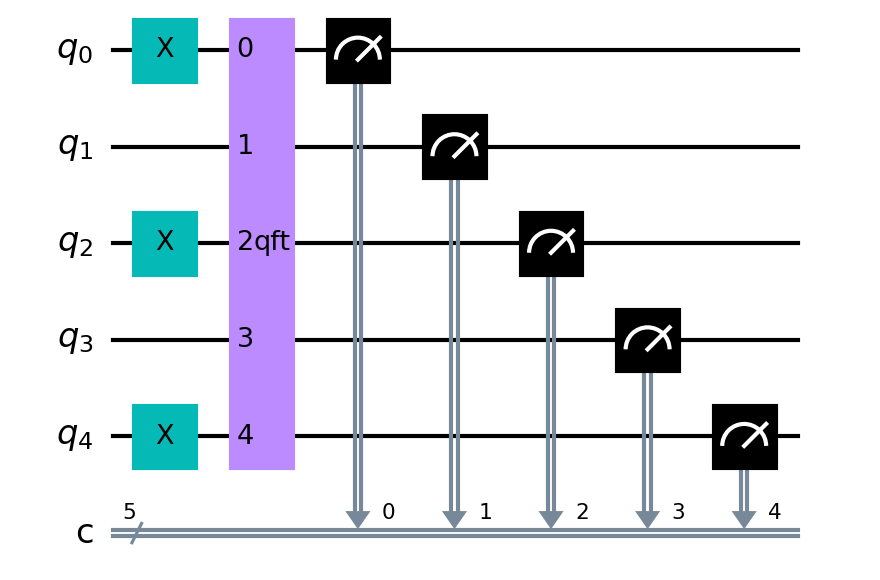

# Visualization of Quantum Circuit 

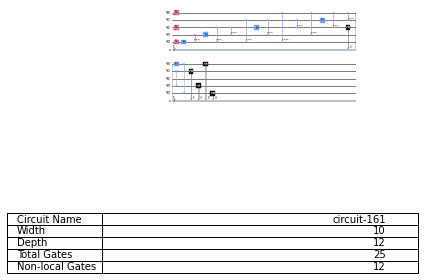

In [8]:
_generate_circuit_library_visualization(circuit)